In [1]:
# 03_Integration_Test.ipynb
import random
import numpy as np
import sys
import os
sys.path.append(os.path.abspath("../"))  # add project root to path

from src.hangman_env import HangmanEnv

In [2]:
# Placeholder HMM model (Person A)
class DummyHMM:
    def get_letter_probs(self, masked_word, guessed_letters):
        # Random probabilities (simulate prediction)
        probs = np.random.rand(26)
        probs = probs / probs.sum()
        return probs

# Placeholder RL agent (Person B)
class DummyRL:
    def build_state(self, masked_word, probs, guessed_letters):
        return np.concatenate([
            np.array([1 if c != '_' else 0 for c in masked_word]),
            probs
        ])
    
    def choose_action(self, state):
        # Pick a random letter that isn't guessed yet
        return random.randint(0, 25)


In [3]:
def play_game(word, hmm_model, rl_agent):
    env = HangmanEnv(word)
    done = False
    total_reward = 0

    while not done:
        masked = env.get_masked_word()
        probs = hmm_model.get_letter_probs(masked, env.guessed)
        state = rl_agent.build_state(masked, probs, env.guessed)
        action = rl_agent.choose_action(state)
        letter = chr(ord('A') + action)

        masked, reward, done = env.step(letter)
        total_reward += reward
    
    success = '_' not in env.get_masked_word()
    wrong_guesses = env.max_attempts - env.remaining_attempts
    return success, total_reward, wrong_guesses


In [4]:
def evaluate_model(words, hmm_model, rl_agent, num_games=50):
    success_count, total_reward, total_wrong = 0, 0, 0

    for _ in range(num_games):
        word = random.choice(words)
        s, r, w = play_game(word, hmm_model, rl_agent)
        success_count += s
        total_reward += r
        total_wrong += w

    success_rate = success_count / num_games
    avg_reward = total_reward / num_games
    avg_wrong = total_wrong / num_games
    score = (success_rate * 2000) - (avg_wrong * 5)

    print(f"✅ Success Rate: {success_rate:.2%}")
    print(f"⭐ Average Reward: {avg_reward:.2f}")
    print(f"❌ Avg Wrong Guesses: {avg_wrong:.2f}")
    print(f"🏁 Final Score: {score:.2f}")


In [5]:
words = ["HELLO", "WORLD", "PYTHON", "DATA", "SCIENCE"]
evaluate_model(words, DummyHMM(), DummyRL(), num_games=10)


✅ Success Rate: 0.00%
⭐ Average Reward: -5.35
❌ Avg Wrong Guesses: 6.00
🏁 Final Score: -30.00


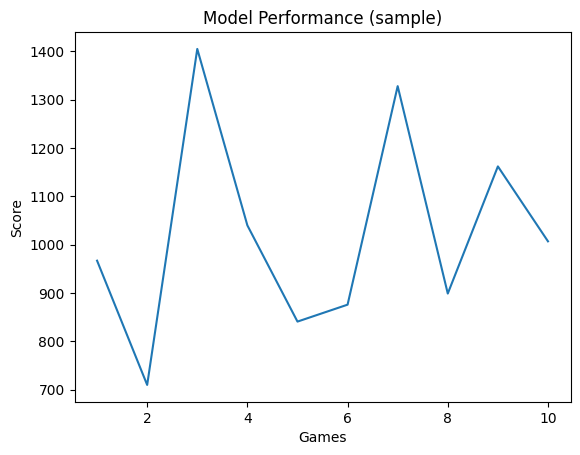

In [6]:
import matplotlib.pyplot as plt

episodes = list(range(1, 11))
scores = [random.randint(500, 1500) for _ in episodes]
plt.plot(episodes, scores)
plt.xlabel("Games")
plt.ylabel("Score")
plt.title("Model Performance (sample)")
plt.show()


In [7]:
def play_game_verbose(word, hmm_model, rl_agent):
    env = HangmanEnv(word)
    done = False
    print(f"\nWord: {word}")
    while not done:
        masked = env.get_masked_word()
        probs = hmm_model.get_letter_probs(masked, env.guessed)
        state = rl_agent.build_state(masked, probs, env.guessed)
        action = rl_agent.choose_action(state)
        letter = chr(ord('A') + action)
        masked, reward, done = env.step(letter)
        print(f"Guess: {letter} → {masked}, Reward: {reward}, Attempts left: {env.remaining_attempts}")
    print("Final:", masked)

In [8]:
# Assuming you still have your dummy models loaded
hmm_model = DummyHMM()
rl_agent = DummyRL()

# Run the verbose game
play_game_verbose("HELLO", hmm_model, rl_agent)


Word: HELLO
Guess: H → H____, Reward: 1, Attempts left: 6
Guess: P → H____, Reward: -1, Attempts left: 5
Guess: A → H____, Reward: -1, Attempts left: 4
Guess: B → H____, Reward: -1, Attempts left: 3
Guess: U → H____, Reward: -1, Attempts left: 2
Guess: M → H____, Reward: -1, Attempts left: 1
Guess: I → H____, Reward: -1, Attempts left: 0
Final: H____
